In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

%reload_ext autoreload
%autoreload 2

### Loading data

In [2]:
from datasets import get_dataset_split_names,load_dataset

path="Bena345/cdc-diabetes-health-indicators"

# To get how they split the data
split_names=get_dataset_split_names(path)
# Number train and test dataset
train_size=10000
test_size=5000

diabetes=load_dataset(path,split=[f'{split_names[0]}[:{train_size}]', f'{split_names[1]}[:{train_size}]'])
diabetes


C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Dataset({
     features: ['ID', 'BMI', 'PhysHlth', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Diabetes_binary'],
     num_rows: 10000
 }),
 Dataset({
     features: ['ID', 'BMI', 'PhysHlth', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Diabetes_binary'],
     num_rows: 10000
 })]

### splitting data

In [3]:
diabetes_train_dataframe=diabetes[0].to_pandas()
diabetes_test_dataframe=diabetes[1].to_pandas()

In [4]:
diabetes_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10000 non-null  int64  
 1   BMI                   10000 non-null  float32
 2   PhysHlth              10000 non-null  float32
 3   Age                   10000 non-null  object 
 4   HighBP                10000 non-null  object 
 5   HighChol              10000 non-null  object 
 6   CholCheck             10000 non-null  object 
 7   Smoker                10000 non-null  object 
 8   Stroke                10000 non-null  object 
 9   HeartDiseaseorAttack  10000 non-null  object 
 10  PhysActivity          10000 non-null  object 
 11  Fruits                10000 non-null  object 
 12  Veggies               10000 non-null  object 
 13  HvyAlcoholConsump     10000 non-null  object 
 14  AnyHealthcare         10000 non-null  object 
 15  NoDocbcCost         

In [5]:
diabetes_train_dataframe.head(5)

,ID,BMI,PhysHlth,Age,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Education,Income,Diabetes_binary
0,114414,29.0,0.0,65 to 69,0,1,1,0,0,0,...,0,1,1,Poor,0,0,0,6,7,Non-Diabetic
1,168896,32.0,0.0,80 or older,1,1,1,0,0,0,...,0,1,0,Poor,0,0,0,Some College Degree,4,Non-Diabetic
2,68354,25.0,5.0,65 to 69,1,0,1,1,0,0,...,0,1,0,Fair,0,0,1,6,2,Non-Diabetic
3,121194,24.0,0.0,80 or older,1,0,1,0,0,0,...,0,1,0,Very Good,0,1,0,Advanced Degree,5,Non-Diabetic
4,141150,31.0,0.0,25 to 29,0,0,1,0,0,1,...,0,1,0,Very Good,5,0,0,6,6,Diabetic


### Visualizing Age Data

In [6]:
diabetes_train_dataframe["Age"].describe()

count        10000
unique          13
top       60 to 64
freq          1342
Name: Age, dtype: object

In [7]:
age_count=diabetes_train_dataframe["Age"].value_counts().sort_index()

age_count

Age
18 to 24        212
25 to 29        304
30 to 34        483
35 to 39        517
40 to 44        632
45 to 49        788
50 to 54       1031
55 to 59       1192
60 to 64       1342
65 to 69       1311
70 to 74        933
75 to 79        605
80 or older     650
Name: count, dtype: int64

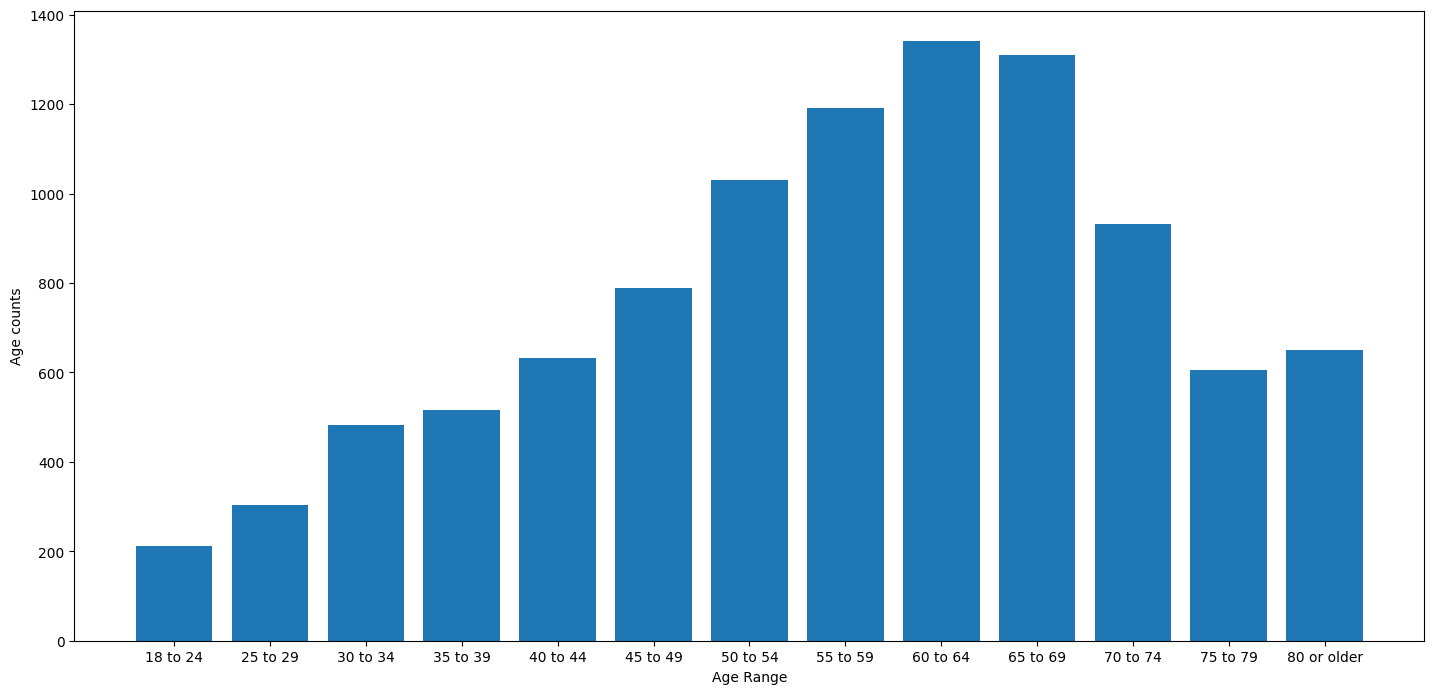

In [8]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.set_xlabel('Age Range')
age_axes.set_ylabel('Age counts')

age_axes.bar(age_count.index,age_count.values)

plt.show()

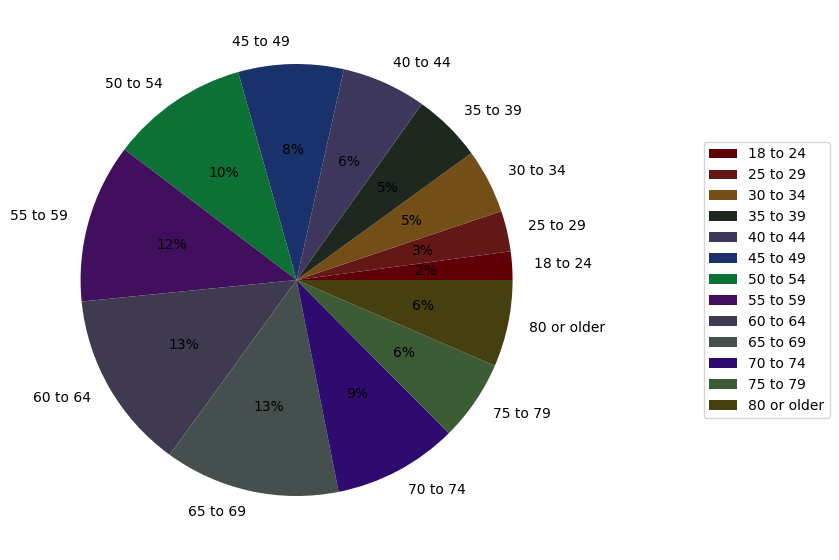

In [9]:
import random

age_figer=plt.figure(figsize=(10,6),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(age_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)

wedges, texts, autotexts=age_axes.pie(age_count.values,labels=age_count.index,
                                      colors=colors,autopct="%1.0f%%") #,textprops=dict(color="w")
plt.legend(wedges,age_count.index,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [10]:
age_diabetes_distribution =(
    diabetes_train_dataframe.groupby(by=["Age","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

age_diabetes_distribution

Diabetes_binary,Diabetic,Non-Diabetic
Age,,
18 to 24,7,205
25 to 29,13,291
30 to 34,15,468
35 to 39,25,492
40 to 44,36,596
45 to 49,85,703
50 to 54,119,912
55 to 59,155,1037
60 to 64,235,1107


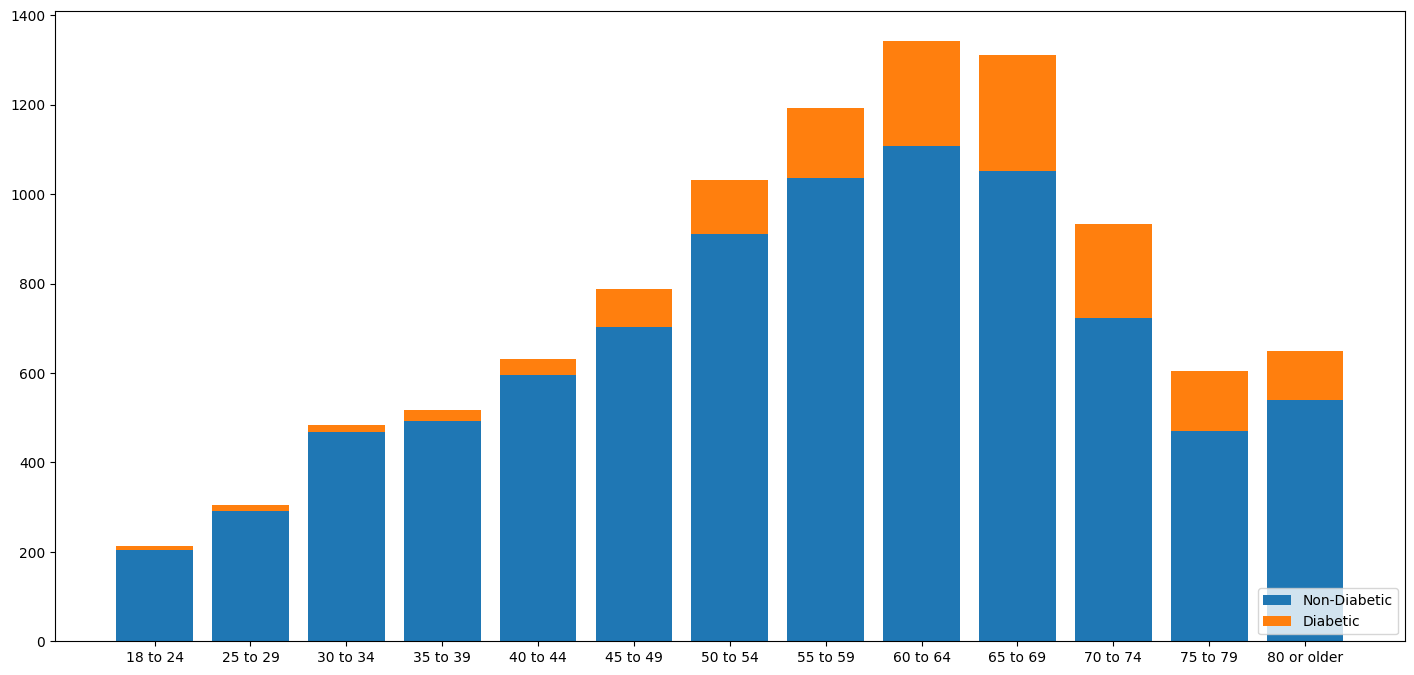

In [11]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.bar(age_diabetes_distribution .index,age_diabetes_distribution ["Non-Diabetic"],label="Non-Diabetic")
age_axes.bar(age_diabetes_distribution .index,age_diabetes_distribution ["Diabetic"],label="Diabetic",bottom=age_diabetes_distribution ["Non-Diabetic"])
plt.legend(loc="lower right")


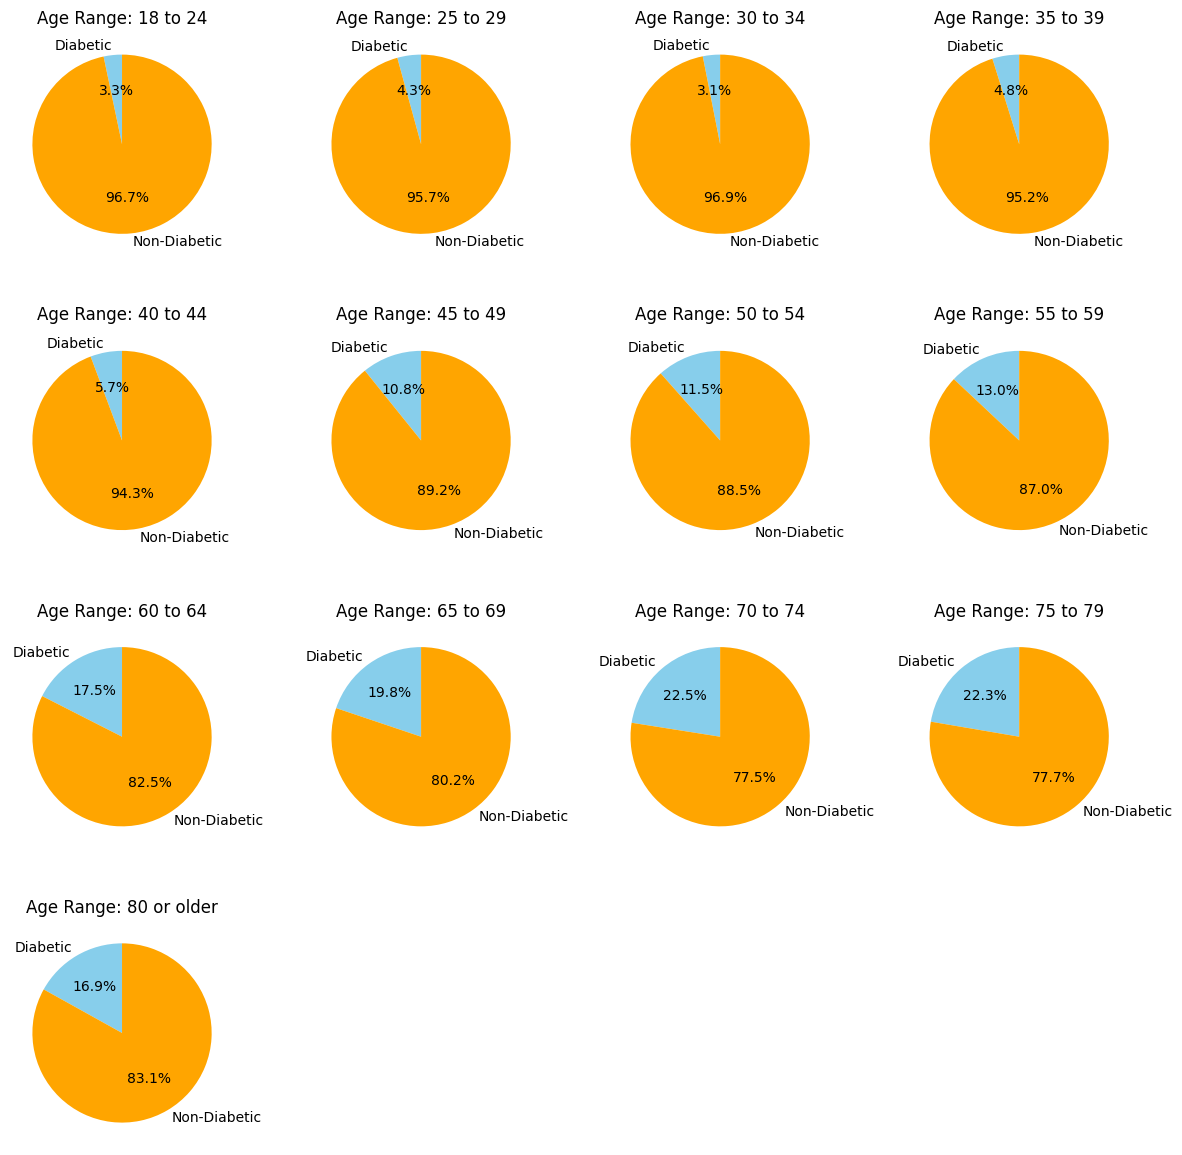

In [12]:
import math

age_diabetes_percentage = age_diabetes_distribution.div(age_diabetes_distribution.sum(axis=1), axis=0) * 100

num_age_ranges = len(age_diabetes_percentage)

rows = math.ceil(num_age_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, age_range in enumerate(age_diabetes_percentage.index):
    data = age_diabetes_percentage.loc[age_range]
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Age Range: {age_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Convert the age range to the average age

In [14]:
# Function get age_range like string the convert it to number 
def get_age_avg(age_range_string):
    age_range=age_range_string.split(" ")
    age_range.remove(age_range[1])
    if age_range[-1]=="older":
        age_range[-1]=100
    for idx in range(2):
        age_range[idx]=int(age_range[idx])
    
    return sum(age_range)/len(age_range)

In [15]:
diabetes_train_dataframe["AvgAge"]=diabetes_train_dataframe["Age"].apply(get_age_avg)
diabetes_test_dataframe["AvgAge"]=diabetes_test_dataframe["Age"].apply(get_age_avg)

diabetes_train_dataframe

,ID,BMI,PhysHlth,Age,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Education,Income,Diabetes_binary,AvgAge
0,114414,29.0,0.0,65 to 69,0,1,1,0,0,0,...,1,1,Poor,0,0,0,6,7,Non-Diabetic,67.0
1,168896,32.0,0.0,80 or older,1,1,1,0,0,0,...,1,0,Poor,0,0,0,Some College Degree,4,Non-Diabetic,90.0
2,68354,25.0,5.0,65 to 69,1,0,1,1,0,0,...,1,0,Fair,0,0,1,6,2,Non-Diabetic,67.0
3,121194,24.0,0.0,80 or older,1,0,1,0,0,0,...,1,0,Very Good,0,1,0,Advanced Degree,5,Non-Diabetic,90.0
4,141150,31.0,0.0,25 to 29,0,0,1,0,0,1,...,1,0,Very Good,5,0,0,6,6,Diabetic,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55340,29.0,10.0,75 to 79,1,1,1,1,0,0,...,1,0,Very Good,0,1,1,Some College Degree,3,Diabetic,77.0
9996,198525,29.0,0.0,55 to 59,1,1,1,0,0,0,...,1,1,Good,30,0,1,6,8,Non-Diabetic,57.0
9997,13972,36.0,30.0,80 or older,1,1,1,1,0,0,...,1,0,Very Good,0,1,0,Some College Degree,2,Diabetic,90.0
9998,216078,45.0,14.0,60 to 64,0,1,1,0,0,0,...,1,0,Good,0,1,0,6,7,Non-Diabetic,62.0
